In [1]:
import gensim
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from DBSCAN import evaluate
import numpy as np
import pandas as pd
from sklearn import preprocessing

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format('E:/Datasets/NLP/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary=True)  

In [3]:
model.most_similar(positive=['woman','king'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [4]:
chair = "A chair is a type of seat, typically designed for one person and consisting of one or more legs, a flat or slightly angled seat and a back-rest. They may be made of wood, metal, or synthetic materials, and may be padded or upholstered in various colors and fabrics."

In [5]:
bull = "A male organism cannot reproduce sexually without access to at least one ovum from a female, but some organisms can reproduce both sexually and asexually. Most male mammals, including male humans, have a Y chromosome, which codes for the production of larger amounts of testosterone to develop male reproductive organs. Not all species share a common sex-determination system. In most animals, including humans, sex is determined genetically; however, species such as Cymothoa exigua change sex depending on the number of females present in the vicinity."

In [6]:
one = "dog cat beast carnivore herbivore mammal pet bird puppy animal rabbit goldfish fish kitten pug pig horse cow"
two = "money currency cash exchange coin gold bank debt value inflation buy tax account barter dollar funds loan invest"

In [24]:
vectors = []
label = []

for word in one.split(" "):
    try:
        vectors.append(model.get_vector(word))
        label.append(0)
    except:
        pass

for word in two.split(" "):
    try:
        vectors.append(model.get_vector(word))
        label.append(1)
    except:
        pass

In [22]:
vectors = []
label = []

for word in chair.split(" "):
    try:
        vectors.append(model.get_vector(word))
        label.append(0)
    except:
        pass

for word in bull.split(" "):
    try:
        vectors.append(model.get_vector(word))
        label.append(1)
    except:
        pass

Estimated number of clusters: 2
Estimated number of noise points: 3
Homogeneity: 0.923
Completeness: 0.694
V-measure: 0.793
Adjusted Rand Index: 0.837
Adjusted Mutual Information: 0.784
Silhouette Coefficient: 0.139
3


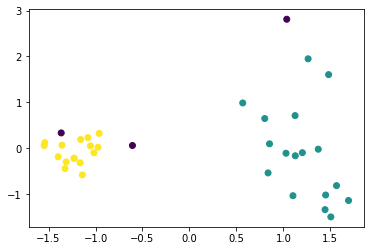

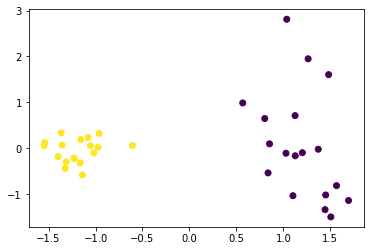

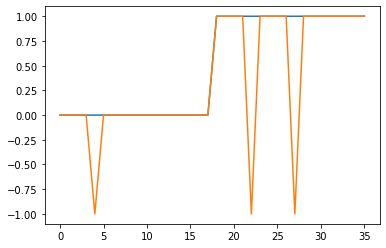

In [25]:
from sklearn.cluster import DBSCAN
eps = 3.5
minPts = 5

pca = PCA()
Xt = pca.fit_transform(vectors)
clustering = DBSCAN(eps=eps, min_samples=minPts).fit(Xt)
labels = clustering.labels_

evaluate(labels, label, Xt, False)

print(len(np.unique(labels)))

plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.show()

plot = plt.scatter(Xt[:,0], Xt[:,1], c=label)
plt.show()

plt.plot(label)
plt.plot(labels)
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 3
Homogeneity: 0.923
Completeness: 0.694
V-measure: 0.793
Adjusted Rand Index: 0.837
Adjusted Mutual Information: 0.784
Silhouette Coefficient: 0.139
3


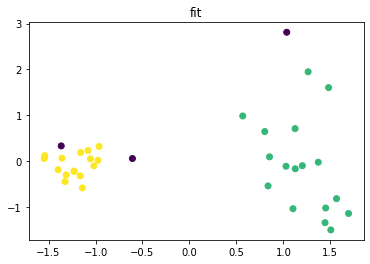

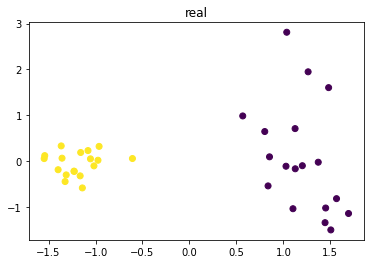

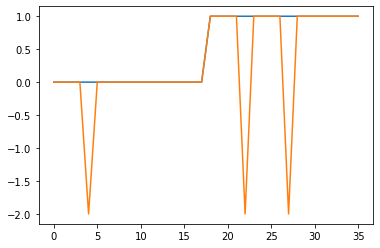

In [26]:
from DBSCAN import DBSCAN, numpyToPoints
eps = 3.5
minPts = 3

Points = numpyToPoints(vectors)
clustering = DBSCAN(eps=eps, minPts=minPts)
clustering.fit(Points)
labels = clustering.labels

evaluate(labels, label, vectors, False)

print(len(np.unique(labels)))

pca = PCA()
Xt = pca.fit_transform(vectors)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.title('fit')
plt.show()

plot = plt.scatter(Xt[:,0], Xt[:,1], c=label)
plt.title('real')
plt.show()

plt.plot(label)
plt.plot(np.array(labels)-1)
plt.show()

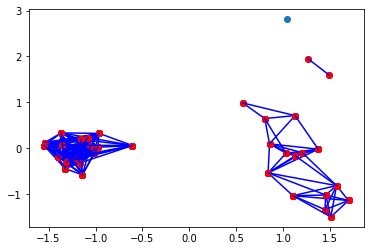

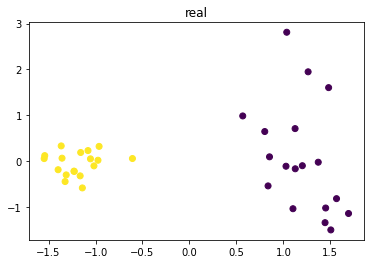

In [27]:
from DBSCAN import HDBSCAN

eps = 3.5
minPts = 3

pca = PCA()
Xt = pca.fit_transform(vectors)
clustering = HDBSCAN(Xt, 0.8)

plot = plt.scatter(Xt[:,0], Xt[:,1], c=label)
plt.title('real')
plt.show()

## Porównanie z k means

Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.155


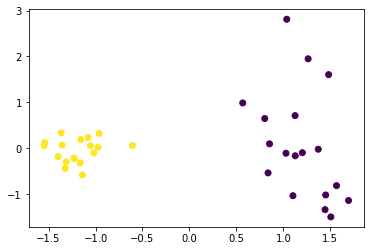

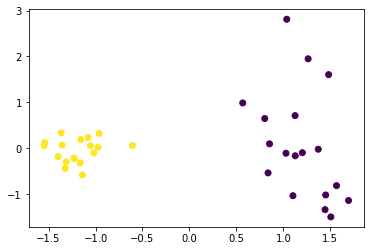

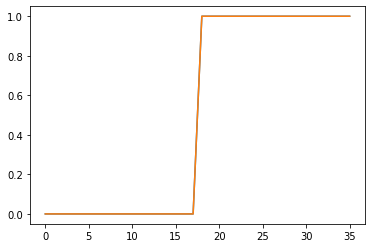

In [28]:
clustering = KMeans(n_clusters=2, random_state=0).fit(vectors)
labels = clustering.labels_

evaluate(labels, label, vectors, False)
# print(words[labels==3])

pca = PCA()
Xt = pca.fit_transform(vectors)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.show()

plot = plt.scatter(Xt[:,0], Xt[:,1], c=label)
plt.show()

plt.plot(label)
plt.plot(labels)
plt.show()

# Inne przeprowadzone eksperymenty

In [14]:
titles = pd.read_csv("scraping/10Articles.csv")#pd.read_csv("100titles.csv")
le = preprocessing.LabelEncoder()
le.fit(titles['category'])
titles['category_categorical'] = le.transform(titles['category'])
print(len(titles['category_categorical'].unique()))
titles

4


,Unnamed: 0,year,ID,category,text,category_categorical
0,0,2010,1,astro-ph,"Draft version October 2, 2020\nTypeset using L...",0
1,0,2010,2,astro-ph,"MNRAS 000, 1{16 (2021) Preprint 4 May 2021 Com...",0
2,0,2010,3,cs,Spectral Decomposition in Deep Networks for\nS...,2
3,0,2010,4,cs,CGI2019 - TVCJ manuscript No.\n(will be insert...,2
4,0,2010,5,hep-th,arXiv:2010.00005v1 [gr-qc] 30 Sep 2020Stable...,3
5,0,2010,6,astro-ph,arXiv:2010.00006v2 [astro-ph.GA] 4 Nov 2020A...,0
6,0,2010,7,astro-ph,arXiv:2010.00007v1 [astro-ph.IM] 30 Sep 2020...,0
7,0,2010,8,astro-ph,Black hole binaries and light elds: Gravitati...,0
8,0,2010,9,cond-mat,Di usive-to-ballistic crossover of symmetry vi...,1


In [31]:
mydataframe = pd.DataFrame(columns=['word','label'])
for i in range(len(titles)):
    for word in titles.loc[i,'text'].split(" "):
        mydataframe = pd.concat([mydataframe,pd.DataFrame({'word':[word],'label':[titles.loc[i,'category_categorical']]})])
mydataframe = mydataframe.drop_duplicates().reset_index()

words = []
vectors = []
label = []

for i in range(len(mydataframe)):
    try:
        vectors.append(model.get_vector(mydataframe.loc[i,'word']))
        label.append(mydataframe.loc[i,'label'])
        words.append(mydataframe.loc[i,'word'])
    except:
        pass

label = np.array(label)
order = np.argsort(label)
label = label[order]
words = np.array(words)[order]
vectors = np.array(vectors)[order]

Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 0.010
Completeness: 0.017
V-measure: 0.013
Adjusted Rand Index: -0.029
Adjusted Mutual Information: 0.012
Silhouette Coefficient: 0.048
[]


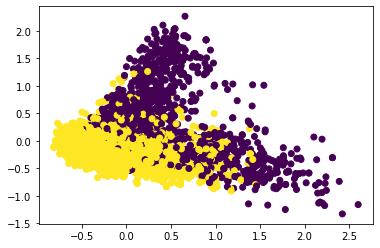

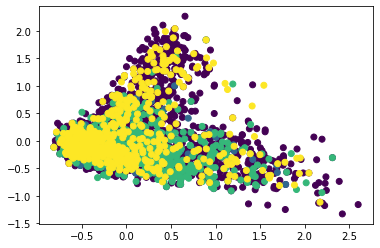

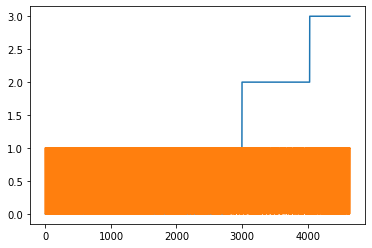

In [32]:
clustering = AgglomerativeClustering().fit(vectors)
labels = clustering.labels_

evaluate(labels, label, vectors, False)
print(words[labels==4])

pca = PCA()
Xt = pca.fit_transform(vectors)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.show()

plot = plt.scatter(Xt[:,0], Xt[:,1], c=label)
plt.show()

plt.plot(label)
plt.plot(labels)
plt.show()

Estimated number of clusters: 49
Estimated number of noise points: 4424
Homogeneity: 0.016
Completeness: 0.044
V-measure: 0.023
Adjusted Rand Index: 0.048
Adjusted Mutual Information: 0.000
Silhouette Coefficient: -0.219
['out' 'out' 'out' 'out']


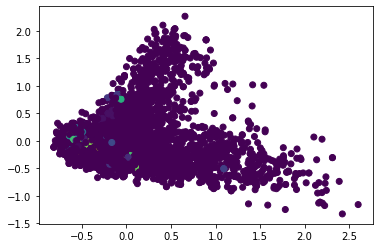

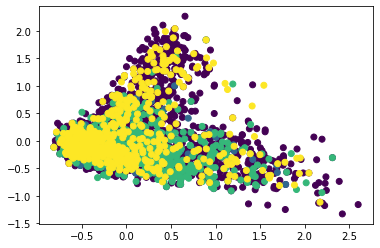

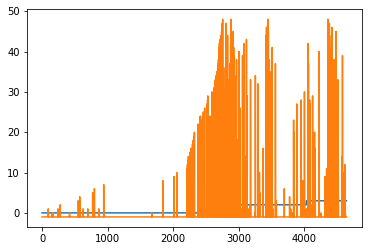

In [35]:
from sklearn.cluster import DBSCAN
eps = 0.1
minPts = 4

clustering = DBSCAN(eps=eps, min_samples=minPts, metric='cosine').fit(vectors)
labels = clustering.labels_

evaluate(labels, label, vectors, False)
print(words[labels==4])

pca = PCA()
Xt = pca.fit_transform(vectors)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.show()

plot = plt.scatter(Xt[:,0], Xt[:,1], c=label)
plt.show()

plt.plot(label)
plt.plot(labels)
plt.show()

In [36]:
print(words[labels==5])

['space' 'space' 'space' 'space']


# Podsumowanie "innych przeprowadzonych eksperymentów"

Na podstawie samego tekstu, z wykorzystaniem word2vwc nie da się dobrze klasyfikować kategorii artykułu. Ponadto jest to problem do którego nie powinien być wykorzystywany dbscan. Dbscan zwróci tylko klas ile "sam uzna za stosowne" pod warunkiem zadanych parametrów eps i minPts. Problem klasyfikacji kategorii artykułu na podstawie tekstu powinno się rozwiązać modelem językowym specjalnie do tego przygotowanym takim jak bert. W takim przypadku wykorzystanie klasteryzacji na reprezentacji powstałej przy wykorzystaniu danych z ostatniej warstwy nie daje dobry wyników. Naszym przypuszczeniem jest to, że przestrzeń jest zbyt rzadka. Ponadto jak już koniecznie chcemy wykorzystać algorytm klasteryzacji do klasyfikacji to powinniśmy użyć np. KMeans, ponieważ jako parametr wejściowy zadawana jest liczba klas. W dbscan musielibyśmy szukać parametrów, które zwróciłyby nam odpowiednią ilość klas. Takie podejście mija się z celem.